<a href="https://colab.research.google.com/github/mortezaaghajanzadeh/Machine-learning-in-Finance/blob/main/Exam/phd430_t5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PhD 430 Take Home Exam: Task 5.**
### Train a gradient boosting model to predict financial crises using data from the Macro History database https://www.macrohistory.net/database/.

In [ ]:
# Load packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, confusion_matrix

## **Load and describe data.**

In [ ]:
# Load data.
file_path = 'https://www.dropbox.com/scl/fi/7d1orgbpbi6ug2c0u3e6w/crisis.csv?rlkey=itacct9ifoo7s672h3stp7ycv&dl=1'
data = pd.read_csv(file_path)

# Print first 5 observations.
data.tail(5)

,year,country,stir,ltrate,debtgdp,mortgage_to_gdp,loans_to_gdp,stock_price_growth,inflation,crisisJST
712,2011,USA,0.10,2.785830,0.960,0.393263,0.589722,0.144177,3.121099,0
713,2012,USA,0.14,1.802500,1.001,0.380139,0.584589,14.394524,2.088378,0
714,2013,USA,0.11,2.350830,1.012,0.374742,0.582943,27.103474,1.452713,0
715,2014,USA,0.09,2.540833,1.032,0.370745,0.589479,13.634956,1.636470,0
716,2015,USA,0.13,2.135833,1.008,0.380449,0.608663,-0.009249,0.115009,0


## **Define features and target.**

The table below provides definitions for the variables in the dataset.

| Variable      | Definition |
| ----------- | ----------- |
| **year** | Year of observation. |
| **country** | Country. |
| **stir**     | Lagged short-term interest rate.       |
| **ltrate**     | Lagged long-term interest rate.       |
| **debtgdp**     | Lagged ratio of debt-to-GDP.       |
| **mortgage_to_gdp**     | Lagged ratio of mortgage loans to GDP.       |
| **loans_to_gdp**   | Lagged ratio of total loans to GDP.       |
| **stock_price_growth** | Lagged stock price growth (percent). |
| **inflation** | Lagged inflation (percent). |
| **crisisJST** | Contemporaneous indicator for a financial crisis (1 = crisis). |

In [ ]:
# Define features.
X = data[['stir', 'debtgdp', 'inflation', 'stock_price_growth']].copy()

# Define target.
y = data['crisisJST'].copy()

## **Train models.**

In [ ]:
# Generate training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=103)

In [ ]:
# Set hyperparameters.
param_set = {'n_estimators': 100, 'learning_rate': 0.10, 'max_depth': 3}

# Instantiate gradient boosting model.
gbt_model = GradientBoostingClassifier(**param_set, random_state=103)

# Train gradient boosting model.
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=103)

## **Evaluate models.**

In [ ]:
# Define function to evaluate trained model.
def evaluate_model(model, X_sample, y_sample):
    # Generate predictions.
    y_pred = model.predict(X_sample)

    # Compute accuracy.
    accuracy = accuracy_score(y_sample, y_pred)

    # Generate confusion matrix.
    conf_matrix = confusion_matrix(y_sample, y_pred)

    # Print accuracy.
    print("Gradient Boosting Classifier - Accuracy:", accuracy)

    # Plot confusion matrix.
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Gradient Boosting Classifier - Accuracy: 1.0


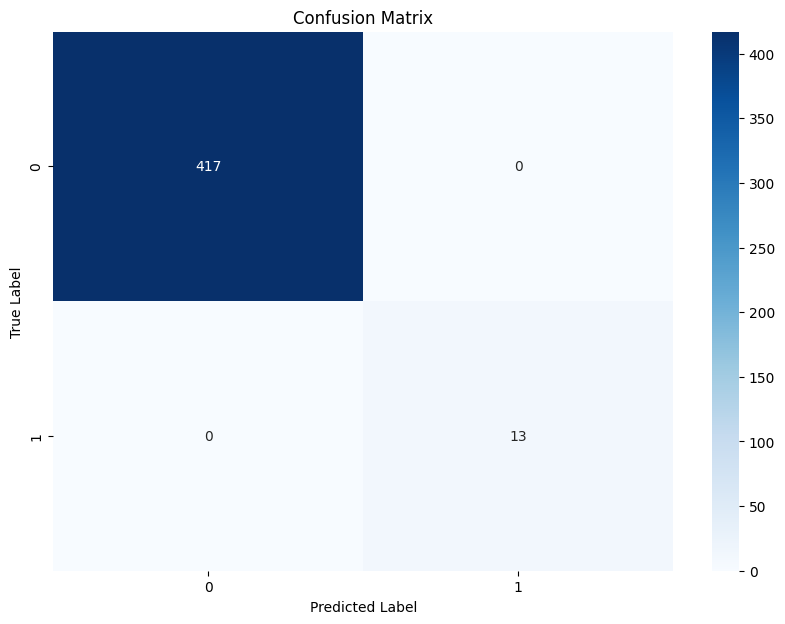

In [ ]:
# Evaluate model on training data.
evaluate_model(gbt_model, X_train, y_train)

Gradient Boosting Classifier - Accuracy: 0.9616724738675958


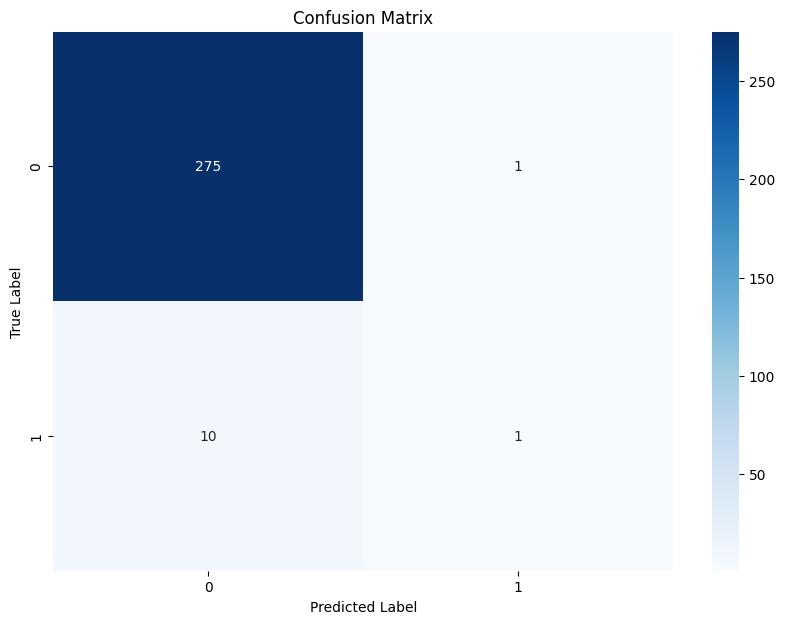

In [ ]:
# Evaluate model on test data.
evaluate_model(gbt_model, X_test, y_test)